In [59]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot  as plt





def plot_feature(booster, figsize):
    fig, ax = plt.subplots(1,1, figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info





sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)

In [60]:
items = pd.read_csv('../input/items.csv')
shops = pd.read_csv('../input/shops.csv')
cats = pd.read_csv('../input/item_categories.csv')
train = pd.read_csv('../input/sales_train.csv')
test = pd.read_csv('../input/test.csv').set_index('ID')


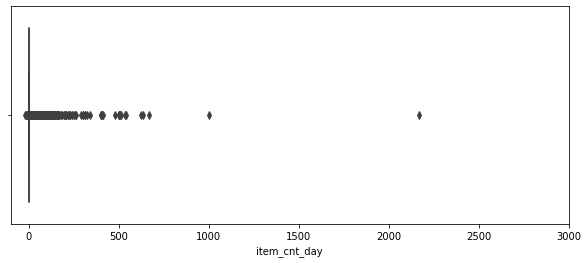

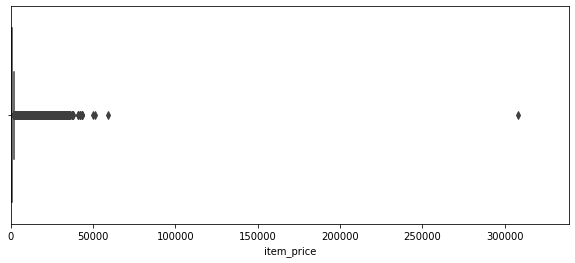

In [61]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)


In [62]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]


In [63]:
median = train[(train.shop_id==32) &(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()
train.loc[train.item_price<0, 'item_price'] = median

In [64]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] =57

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58


In [65]:

shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x:  x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

cats['split'] = cats['item_category_name'].str.split('-')
cats['type'] = cats['split'].map(lambda x: x[0].strip())
cats['type_code'] = LabelEncoder().fit_transform(cats['type'])

cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats['subtype_code'] = LabelEncoder().fit_transform(cats['subtype'])
cats = cats[['item_category_id', 'type_code', 'subtype_code']]

items.drop(['item_name'], axis=1, inplace=True)

In [66]:
len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))),len(list(set(test.item_id))),len(test)


(363, 5100, 214200)

In [67]:
set(test.item_id).intersection(set(train.item_id))

{8192,
 8193,
 16388,
 16395,
 16396,
 16398,
 8208,
 8214,
 8218,
 8219,
 30,
 31,
 32,
 33,
 8226,
 38,
 42,
 45,
 8237,
 8238,
 51,
 8244,
 53,
 16436,
 8247,
 57,
 8249,
 59,
 8251,
 62,
 64,
 8256,
 8257,
 67,
 8260,
 69,
 70,
 16450,
 72,
 16451,
 16459,
 76,
 16461,
 80,
 16469,
 88,
 16474,
 91,
 93,
 8287,
 8296,
 109,
 16494,
 8322,
 16515,
 8327,
 138,
 8330,
 8335,
 8336,
 149,
 16534,
 153,
 154,
 16541,
 16543,
 8352,
 8357,
 166,
 16549,
 8363,
 8364,
 8365,
 8366,
 16556,
 16560,
 180,
 8373,
 16567,
 16573,
 8386,
 16582,
 8391,
 16585,
 202,
 16586,
 205,
 8397,
 8398,
 8400,
 16595,
 213,
 8410,
 16604,
 8416,
 226,
 8418,
 8421,
 16613,
 234,
 16618,
 8428,
 8429,
 8436,
 16629,
 248,
 8443,
 253,
 16638,
 16639,
 8448,
 259,
 8452,
 8453,
 8454,
 8455,
 8456,
 8457,
 8459,
 8460,
 269,
 8461,
 16653,
 16655,
 16657,
 8468,
 8469,
 8470,
 8471,
 8472,
 18572,
 8474,
 8482,
 8484,
 16676,
 16679,
 16680,
 8491,
 18573,
 16690,
 16691,
 308,
 8502,
 8504,
 313,
 16697

In [68]:
ts = time.time()
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))

matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)
time.time() - ts


11.00900387763977

In [69]:
train['revenue'] = train['item_price'] * train['item_cnt_day']


In [70]:
matrix[matrix['shop_id']==46]

,date_block_num,shop_id,item_id
350245,0,46,19
352485,0,46,27
355958,0,46,28
353651,0,46,29
349937,0,46,32
...,...,...,...
10682180,33,46,22162
10682370,33,46,22163
10683036,33,46,22164
10684562,33,46,22166


In [71]:
ts = time.time()
group = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day':['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month']
                                    .fillna(0)
                                    .clip(0,20)
                                    .astype(np.float16))

time.time() - ts


4.9399354457855225

In [72]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] =test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

ts = time.time()

matrix = pd.concat([matrix, test], ignore_index=True,sort=False,keys=cols)
matrix.fillna(0, inplace=True)
time.time() - ts


0.06437039375305176

In [73]:
ts = time.time()
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix = pd.merge(matrix, items, on=['item_id'], how='left')
matrix = pd.merge(matrix, cats, on=['item_category_id'], how='left')
matrix['city_code'] = matrix['city_code'].astype(np.int8)
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)
matrix['type_code'] = matrix['type_code'].astype(np.int8)
matrix['subtype_code'] = matrix['subtype_code'].astype(np.int8)
time.time() - ts



4.029015064239502

In [74]:
matrix['city_code'].unique()

array([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 24, 25, 26, 28, 29, 30,  3, 27,  5, 23, 14], dtype=int8)

In [75]:
shops['city_code'].unique()

array([29,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])

In [76]:
shops

,shop_id,city_code
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2
5,5,3
6,6,4
7,7,4
8,8,4
9,9,5
